In [9]:
import keras

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


In [12]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense, Activation
from keras.layers.normalization import BatchNormalization


## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)

model_tf = Sequential()
model_tf.add(Conv2D(40, kernel_size=7, padding="same", input_shape=X_train.shape[1:]))
model_tf.add(MaxPooling2D(pool_size=2))
model_tf.add(Dropout(0.2))
model_tf.add(Conv2D(80, kernel_size=5, padding="same"))
model_tf.add(MaxPooling2D(pool_size=2))
model_tf.add(Dropout(0.2))
model_tf.add(Conv2D(160, kernel_size=3, padding="same"))
model_tf.add(MaxPooling2D(pool_size=2))

model_tf.add(GlobalAveragePooling2D())
model_tf.add(Dense(300))
model_tf.add(Dropout(0.2))
model_tf.add(Dense(30))


# Summarize the model
model_tf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 40)        2000      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 40)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 40)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 80)        80080     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 80)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 80)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 160)       115360    
__________

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 79s - loss: 0.0928 - acc: 0.4030 - val_loss: 0.0139 - val_acc: 0.6963
Epoch 2/100
1712/1712 [==============================] - 82s - loss: 0.0232 - acc: 0.5350 - val_loss: 0.0081 - val_acc: 0.6963
Epoch 3/100
1712/1712 [==============================] - 81s - loss: 0.0157 - acc: 0.6016 - val_loss: 0.0127 - val_acc: 0.6963
Epoch 4/100
1712/1712 [==============================] - 82s - loss: 0.0097 - acc: 0.6308 - val_loss: 0.0049 - val_acc: 0.6893
Epoch 5/100
1712/1712 [==============================] - 84s - loss: 0.0080 - acc: 0.6495 - val_loss: 0.0048 - val_acc: 0.6963
Epoch 6/100
1712/1712 [==============================] - 84s - loss: 0.0067 - acc: 0.6595 - val_loss: 0.0056 - val_acc: 0.6963
Epoch 7/100
1712/1712 [==============================] - 85s - loss: 0.0094 - acc: 0.6478 - val_loss: 0.0046 - val_acc: 0.6963
Epoch 8/100
1712/1712 [==============================] - 86s - l

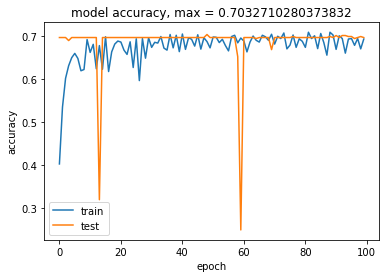

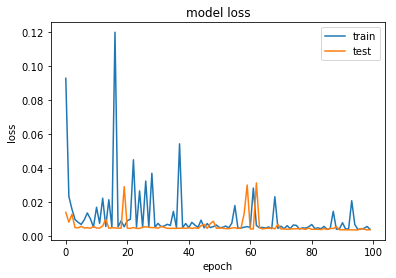

In [13]:
#lstmweights=model.get_weights('./tf_model.h5')
#model.load_weights('./tf_model.h5')
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import CSVLogger
import pandas as pd

## TODO: Compile the model
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model_tf_40_noreg_ker753_dr_222_gap_300_nobutnorm_rmsp_100.h5', 
                               verbose=1, save_best_only=True)

#rmsprop = RMSprop(lr=0.0007, rho=0.9, epsilon=1e-08, decay=0.0000001)
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_tf.compile(optimizer='rmsprop', loss="mean_squared_error", metrics=['accuracy'])

csv_logger = CSVLogger('model_tf_40_noreg_ker753_dr_222_gap_300_nobutnorm_rmsp_100.csv',
                       append=True,separator=';')

## TODO: Train the model
history = model_tf.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, 
                 validation_split=0.2, callbacks=[csv_logger,checkpointer])

#pd.DataFrame(history.history).to_csv('model_tf_40_noreg_ker753_dr_222_gap_300_nobutnorm_rmsp_100.csv')

## TODO: Save the model as model.h5
model_tf.save('model_tf_40_noreg_ker753_dr_222_gap_300_nobutnorm_rmsp_100.h5')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy, max = {}'.format(max(history.history['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       32896     
__________

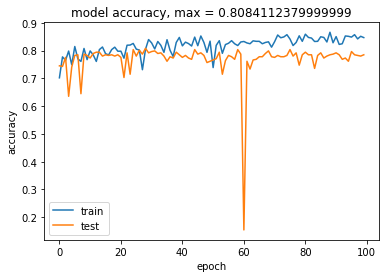

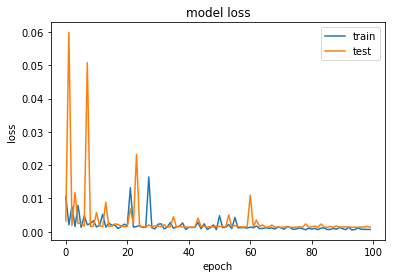

In [14]:
import pandas as pd

data = pd.read_csv('./cv_models/_no_no_f_500_1_dr_222_rmsprop_50_history.csv')

model_start_rmsprop = load_model('./cv_models/_no_no_f_500_1_dr_222_rmsprop_50_history.h5')
model_start_rmsprop.summary()

# summarize history for accuracy
plt.plot(data['acc'])
plt.plot(data['val_acc'])
plt.title('model accuracy, max = {}'.format(max(data['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       32896     
__________

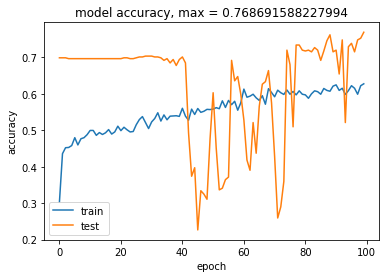

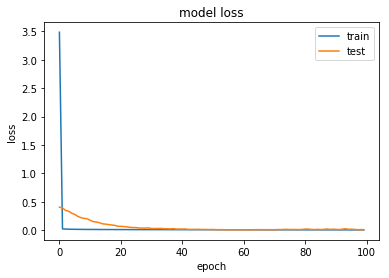

In [15]:
model_start_adamax = Sequential()
model_start_adamax.add(Conv2D(32, kernel_size=2, padding="same", input_shape=X_train.shape[1:]))
model_start_adamax.add(MaxPooling2D(pool_size=2))
model_start_adamax.add(Dropout(0.2))
model_start_adamax.add(Conv2D(64, kernel_size=2, padding="same"))
model_start_adamax.add(MaxPooling2D(pool_size=2))
model_start_adamax.add(Dropout(0.2))
model_start_adamax.add(Conv2D(128, kernel_size=2, padding="same"))
model_start_adamax.add(MaxPooling2D(pool_size=2))

model_start_adamax.add(Flatten())
model_start_adamax.add(Dense(512))
model_start_adamax.add(Dropout(0.2))
model_start_adamax.add(Dense(30))


# Summarize the model
model_start_adamax.summary()

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import CSVLogger
import pandas as pd

## TODO: Compile the model
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model_start_adamax_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5', 
                               verbose=1, save_best_only=True)

#rmsprop = RMSprop(lr=0.0007, rho=0.9, epsilon=1e-08, decay=0.0000001)
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_start_adamax.compile(optimizer='adamax', loss="mean_squared_error", metrics=['accuracy'])

csv_logger = CSVLogger('model_start_adamax_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv',
                       append=True,separator=';')

## TODO: Train the model
history = model_start_adamax.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, 
                 validation_split=0.2, callbacks=[csv_logger,checkpointer])

#pd.DataFrame(history.history).to_csv('model_tf_40_noreg_ker753_dr_222_gap_300_nobutnorm_rmsp_100.csv')

## TODO: Save the model as model.h5
model_start_adamax.save('model_start_adamax_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy, max = {}'.format(max(history.history['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       32896     
__________

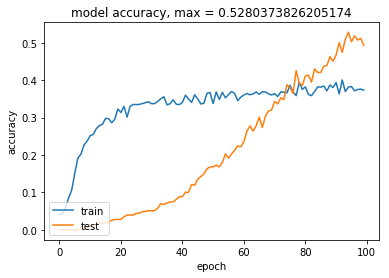

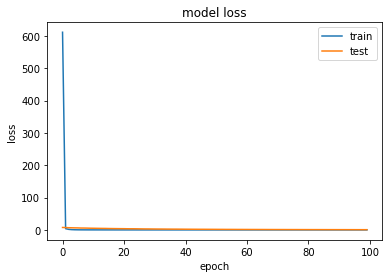

In [16]:
model_start_adagrad = Sequential()
model_start_adagrad.add(Conv2D(32, kernel_size=2, padding="same", input_shape=X_train.shape[1:]))
model_start_adagrad.add(MaxPooling2D(pool_size=2))
model_start_adagrad.add(Dropout(0.2))
model_start_adagrad.add(Conv2D(64, kernel_size=2, padding="same"))
model_start_adagrad.add(MaxPooling2D(pool_size=2))
model_start_adagrad.add(Dropout(0.2))
model_start_adagrad.add(Conv2D(128, kernel_size=2, padding="same"))
model_start_adagrad.add(MaxPooling2D(pool_size=2))

model_start_adagrad.add(Flatten())
model_start_adagrad.add(Dense(512))
model_start_adagrad.add(Dropout(0.2))
model_start_adagrad.add(Dense(30))


# Summarize the model
model_start_adagrad.summary()

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import CSVLogger
import pandas as pd

## TODO: Compile the model
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model_start_adagrad_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5', 
                               verbose=1, save_best_only=True)

#rmsprop = RMSprop(lr=0.0007, rho=0.9, epsilon=1e-08, decay=0.0000001)
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_start_adagrad.compile(optimizer='adagrad', loss="mean_squared_error", metrics=['accuracy'])

csv_logger = CSVLogger('model_start_adagrad_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv',
                       append=True,separator=';')

## TODO: Train the model
history = model_start_adagrad.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, 
                 validation_split=0.2, callbacks=[csv_logger,checkpointer])

#pd.DataFrame(history.history).to_csv('model_start_adagrad_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv')

## TODO: Save the model as model.h5
model_start_adagrad.save('model_start_adagrad_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy, max = {}'.format(max(history.history['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)       32896     
__________

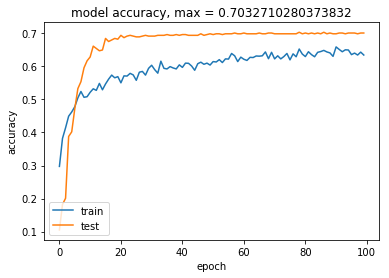

<function matplotlib.pyplot.show>

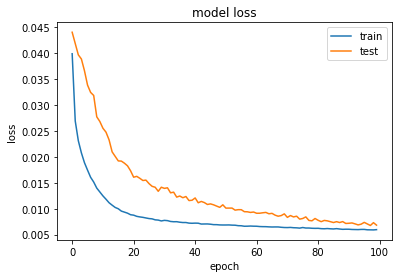

In [17]:
model_start_sgd = Sequential()
model_start_sgd.add(Conv2D(32, kernel_size=2, padding="same", input_shape=X_train.shape[1:]))
model_start_sgd.add(MaxPooling2D(pool_size=2))
model_start_sgd.add(Dropout(0.2))
model_start_sgd.add(Conv2D(64, kernel_size=2, padding="same"))
model_start_sgd.add(MaxPooling2D(pool_size=2))
model_start_sgd.add(Dropout(0.2))
model_start_sgd.add(Conv2D(128, kernel_size=2, padding="same"))
model_start_sgd.add(MaxPooling2D(pool_size=2))

model_start_sgd.add(Flatten())
model_start_sgd.add(Dense(512))
model_start_sgd.add(Dropout(0.2))
model_start_sgd.add(Dense(30))


# Summarize the model
model_start_sgd.summary()

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import CSVLogger
import pandas as pd

## TODO: Compile the model
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model_start_sgd_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5', 
                               verbose=1, save_best_only=True)

#rmsprop = RMSprop(lr=0.0007, rho=0.9, epsilon=1e-08, decay=0.0000001)
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_start_sgd.compile(optimizer='sgd', loss="mean_squared_error", metrics=['accuracy'])

csv_logger = CSVLogger('model_start_sgd_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv',
                       append=True,separator=';')

## TODO: Train the model
history = model_start_sgd.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, 
                 validation_split=0.2, callbacks=[csv_logger,checkpointer])

#pd.DataFrame(history.history).to_csv('model_start_sgd_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv')

## TODO: Save the model as model.h5
model_start_sgd.save('model_start_sgd_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy, max = {}'.format(max(history.history['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 128)       32896     
__________

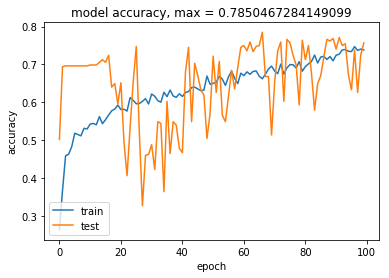

<function matplotlib.pyplot.show>

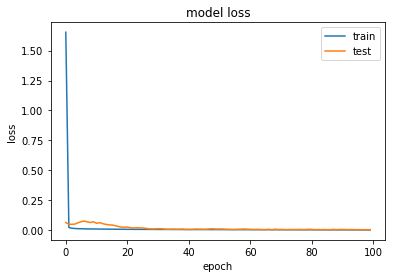

In [18]:
model_start_adam = Sequential()
model_start_adam.add(Conv2D(32, kernel_size=2, padding="same", input_shape=X_train.shape[1:]))
model_start_adam.add(MaxPooling2D(pool_size=2))
model_start_adam.add(Dropout(0.2))
model_start_adam.add(Conv2D(64, kernel_size=2, padding="same"))
model_start_adam.add(MaxPooling2D(pool_size=2))
model_start_adam.add(Dropout(0.2))
model_start_adam.add(Conv2D(128, kernel_size=2, padding="same"))
model_start_adam.add(MaxPooling2D(pool_size=2))

model_start_adam.add(Flatten())
model_start_adam.add(Dense(512))
model_start_adam.add(Dropout(0.2))
model_start_adam.add(Dense(30))


# Summarize the model
model_start_adam.summary()

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import CSVLogger
import pandas as pd

## TODO: Compile the model
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model_start_adam_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5', 
                               verbose=1, save_best_only=True)

#rmsprop = RMSprop(lr=0.0007, rho=0.9, epsilon=1e-08, decay=0.0000001)
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_start_adam.compile(optimizer='adam', loss="mean_squared_error", metrics=['accuracy'])

csv_logger = CSVLogger('model_start_adam_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv',
                       append=True,separator=';')

## TODO: Train the model
history = model_start_adam.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, 
                 validation_split=0.2, callbacks=[csv_logger,checkpointer])

#pd.DataFrame(history.history).to_csv('model_start_sgd_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv')

## TODO: Save the model as model.h5
model_start_adam.save('model_start_adam_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy, max = {}'.format(max(history.history['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 128)       32896     
__________

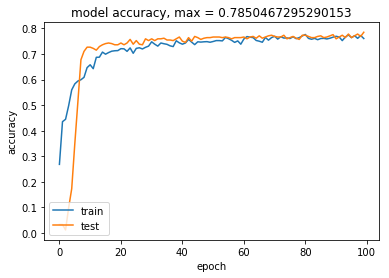

<function matplotlib.pyplot.show>

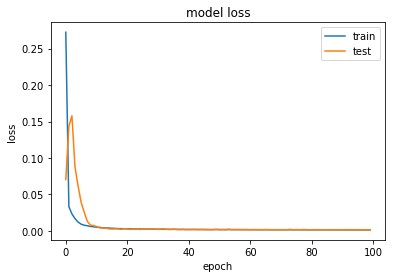

In [19]:
model_start_adadelta = Sequential()
model_start_adadelta.add(Conv2D(32, kernel_size=2, padding="same", input_shape=X_train.shape[1:]))
model_start_adadelta.add(MaxPooling2D(pool_size=2))
model_start_adadelta.add(Dropout(0.2))
model_start_adadelta.add(Conv2D(64, kernel_size=2, padding="same"))
model_start_adadelta.add(MaxPooling2D(pool_size=2))
model_start_adadelta.add(Dropout(0.2))
model_start_adadelta.add(Conv2D(128, kernel_size=2, padding="same"))
model_start_adadelta.add(MaxPooling2D(pool_size=2))

model_start_adadelta.add(Flatten())
model_start_adadelta.add(Dense(512))
model_start_adadelta.add(Dropout(0.2))
model_start_adadelta.add(Dense(30))


# Summarize the model
model_start_adadelta.summary()

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import CSVLogger
import pandas as pd

## TODO: Compile the model
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model_start_adadelta_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5', 
                               verbose=1, save_best_only=True)

#rmsprop = RMSprop(lr=0.0007, rho=0.9, epsilon=1e-08, decay=0.0000001)
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_start_adadelta.compile(optimizer='adadelta', loss="mean_squared_error", metrics=['accuracy'])

csv_logger = CSVLogger('model_start_adadelta_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv',
                       append=True,separator=';')

## TODO: Train the model
history = model_start_adadelta.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, 
                 validation_split=0.2, callbacks=[csv_logger,checkpointer])

#pd.DataFrame(history.history).to_csv('model_start_adagrad_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv')

## TODO: Save the model as model.h5
model_start_adadelta.save('model_start_adadelta_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy, max = {}'.format(max(history.history['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 128)       32896     
__________

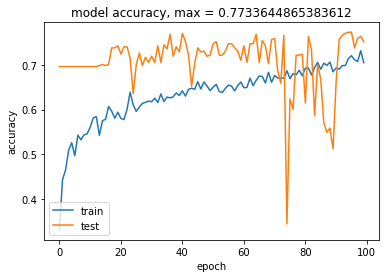

<function matplotlib.pyplot.show>

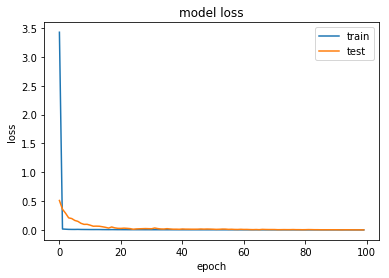

In [20]:
model_start_nadam = Sequential()
model_start_nadam.add(Conv2D(32, kernel_size=2, padding="same", input_shape=X_train.shape[1:]))
model_start_nadam.add(MaxPooling2D(pool_size=2))
model_start_nadam.add(Dropout(0.2))
model_start_nadam.add(Conv2D(64, kernel_size=2, padding="same"))
model_start_nadam.add(MaxPooling2D(pool_size=2))
model_start_nadam.add(Dropout(0.2))
model_start_nadam.add(Conv2D(128, kernel_size=2, padding="same"))
model_start_nadam.add(MaxPooling2D(pool_size=2))

model_start_nadam.add(Flatten())
model_start_nadam.add(Dense(512))
model_start_nadam.add(Dropout(0.2))
model_start_nadam.add(Dense(30))


# Summarize the model
model_start_nadam.summary()

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import CSVLogger
import pandas as pd

## TODO: Compile the model
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model_start_nadam_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5', 
                               verbose=1, save_best_only=True)

#rmsprop = RMSprop(lr=0.0007, rho=0.9, epsilon=1e-08, decay=0.0000001)
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_start_nadam.compile(optimizer='nadam', loss="mean_squared_error", metrics=['accuracy'])

csv_logger = CSVLogger('model_start_nadam_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv',
                       append=True,separator=';')

## TODO: Train the model
history = model_start_nadam.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, 
                 validation_split=0.2, callbacks=[csv_logger,checkpointer])

#pd.DataFrame(history.history).to_csv('model_start_nadam_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.csv')

## TODO: Save the model as model.h5
model_start_nadam.save('model_start_nadam_32_noreg_ker222_dr_222_f_500_nobutnorm_adamax_100.h5')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy, max = {}'.format(max(history.history['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show

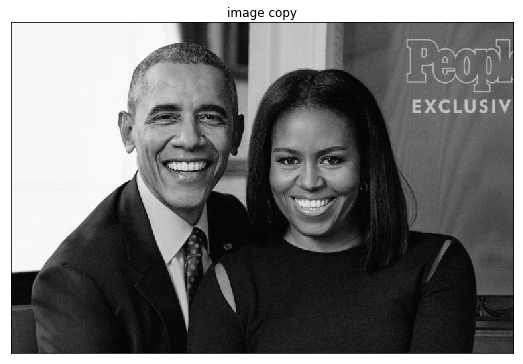

In [21]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_copy = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy, cmap='gray')

In [30]:
### TODO: Use the face detection code we saw in Section 1 with your trained conv-net 
## TODO : Paint the predicted keypoints on the test image
model_start_rmsprop.load_weights("./model_150_adadelta_32_noreg_ker222_dr_222_f_500_nobutnorm_adadelta_100.h5")
face_cascade = cv2.CascadeClassifier("detector_architectures/haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(image_copy, 1.25, 6)

def denormalize(value):
    return int(round(value * 48 + 48))

image_with_landmarks = image.copy()

for (x, y, w, h) in faces:
    copy = image_copy.copy()
    roi = copy[y:y+h, x:x+w]
    resized = cv2.resize(roi, (96, 96))
    pred = np.array([resized])/255.
    pred = pred[..., np.newaxis]
    np.moveaxis(pred, 1, 3)
    y_pred = model_start_adadelta.predict(pred)
    den_pred = list(map(denormalize, y_pred[0]))
    print("Original w: {}, ratio: {}".format(w, float(w/96)))
    scale = w / 96
    for i in range(0, 15):
        cx = x + int((den_pred[i * 2]) * scale)
        cy = y + int((den_pred[i * 2 + 1]) * scale)
        cv2.circle(image_with_landmarks, (cx, cy), 1, (0, 255, 0), 3)

    print(y_pred, den_pred)

OSError: Unable to open file (Unable to open file: name = './model_150_adadelta_32_noreg_ker222_dr_222_f_500_nobutnorm_adadelta_100.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

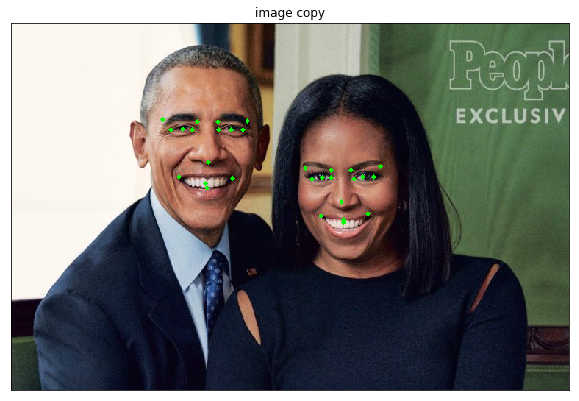

In [28]:
# plot our image
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_with_landmarks)

In [115]:
import pandas as pd

data = pd.read_csv('./cv_models/10_3l2_no_no_f_256_1_dr_224_lr_001_d_01_rmsprop_50_history.csv')

In [116]:
data.head()

Unnamed: 0       acc      loss   val_acc  val_loss
0           0  0.344626  2.939794  0.696262  1.308682
1           1  0.373832  1.031093  0.693925  0.771426
2           2  0.466122  0.540228  0.700935  0.339732
3           3  0.544977  0.231967  0.703271  0.140241
4           4  0.590537  0.096626  0.698598  0.058263

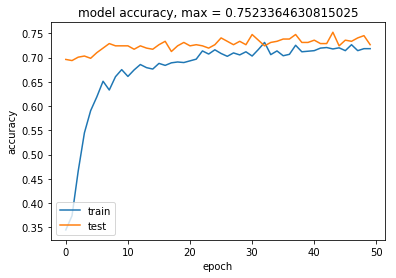

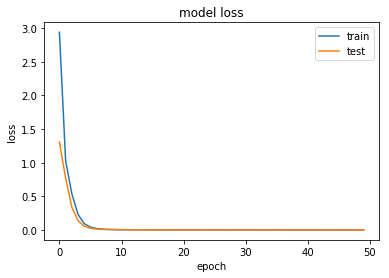

In [117]:
# summarize history for accuracy
plt.plot(data['acc'])
plt.plot(data['val_acc'])
plt.title('model accuracy, max = {}'.format(max(data['val_acc'])))

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [129]:
import h5py
f = h5py.File('./cv_models/10_3l2_no_no_f_256_1_dr_224_lr_001_d_01_rmsprop_50_history.h5')
#del f['optimizer_weights']
f.close()

In [130]:
model_3 = load_model('./cv_models/10_3l2_no_no_f_256_1_dr_224_lr_001_d_01_rmsprop_50_history.h5')

In [133]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 128)       32896     
__________

In [ ]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import CSVLogger
import pandas as pd

## TODO: Compile the model
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model_3_adamax.h5', verbose=1, save_best_only=True)

#rmsprop = RMSprop(lr=0.0007, rho=0.9, epsilon=1e-08, decay=0.0000001)
#rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_3.compile(optimizer='adamax', loss="mean_squared_error", metrics=['accuracy'])

csv_logger = CSVLogger('model_3_adamax.csv',append=True,separator=';')

## TODO: Train the model
history = model_3.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, 
                 validation_split=0.2, callbacks=[csv_logger,checkpointer])

pd.DataFrame(history.history).to_csv('model_3_adamax.csv')

## TODO: Save the model as model.h5
model_3.save('model_3_adamax.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 30s - loss: 0.0071 - acc: 0.7109 - val_loss: 0.0032 - val_acc: 0.7407
Epoch 2/50
1712/1712 [==============================] - 30s - loss: 0.0038 - acc: 0.7173 - val_loss: 0.0031 - val_acc: 0.7196
Epoch 3/50
1712/1712 [==============================] - 30s - loss: 0.0037 - acc: 0.7179 - val_loss: 0.0031 - val_acc: 0.7360
Epoch 4/50
1712/1712 [==============================] - 31s - loss: 0.0036 - acc: 0.7249 - val_loss: 0.0030 - val_acc: 0.7313
Epoch 5/50
1712/1712 [==============================] - 31s - loss: 0.0036 - acc: 0.7261 - val_loss: 0.0030 - val_acc: 0.7336
Epoch 6/50
1712/1712 [==============================] - 30s - loss: 0.0035 - acc: 0.7266 - val_loss: 0.0030 - val_acc: 0.7290
Epoch 7/50
1712/1712 [==============================] - 31s - loss: 0.0035 - acc: 0.7255 - val_loss: 0.0029 - val_acc: 0.7360
Epoch 8/50
1712/1712 [==============================] - 30s - loss: 0.0

In [29]:
### TODO: Use the face detection code we saw in Section 1 with your trained conv-net 
## TODO : Paint the predicted keypoints on the test image
model_3.load_weights("./model_150_adadelta_32_noreg_ker222_dr_222_f_500_nobutnorm_adadelta_100.h5")
face_cascade = cv2.CascadeClassifier("detector_architectures/haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(image_copy, 1.25, 6)

def denormalize(value):
    return int(round(value * 48 + 48))

image_with_landmarks = image.copy()

for (x, y, w, h) in faces:
    copy = image_copy.copy()
    roi = copy[y:y+h, x:x+w]
    resized = cv2.resize(roi, (96, 96))
    pred = np.array([resized])/255.
    pred = pred[..., np.newaxis]
    np.moveaxis(pred, 1, 3)
    y_pred = model_3.predict(pred)
    den_pred = list(map(denormalize, y_pred[0]))
    print("Original w: {}, ratio: {}".format(w, float(w/96)))
    scale = w / 96
    for i in range(0, 15):
        cx = x + int((den_pred[i * 2]) * scale)
        cy = y + int((den_pred[i * 2 + 1]) * scale)
        cv2.circle(image_with_landmarks, (cx, cy), 1, (0, 255, 0), 3)

    print(y_pred, den_pred)

NameError: name 'model_3' is not defined

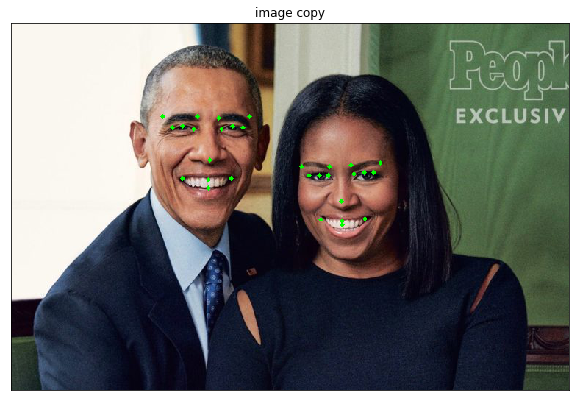

In [123]:
# plot our image
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_with_landmarks)